# PROJECT ..........IN PYTHON

# Project introduction / problem statement :- implement a predictive model to determine whether an employee is going to
#                                              quit or not from the orginazation

# Data source :-  Kaggle

# Describe the dataset :- 

     # Dataset Structure: 1470 observations (rows), 35 features (variables)
     # Target_Varible :- Attrition 
     # Missing Data: there is no missing data! this will make it easier to work with the dataset.
     # In Attrition Column , YES - means person is about to leave or person has already left ,
     #                        NO- means person has not left or still working 
     # Data Type: We only have two datatypes in this dataset: objects and integers
     # Label" Attrition is the label in our dataset and we would like to find out why employees are leaving the organization!
     # Imbalanced dataset: 1237 (84% of cases) employees did not leave the organization while 237 (16% of cases) did leave
     # the organization making our dataset to be considered imbalanced since more people stay in the organization than
     # they actually leave.
    
# Describe the treatment on the data :- 

1) import pandas and numpy to data manupulation and analysis 
2) Read the csv data set using pandas 
3) Find the heads and tails of the data 
4) Moved to the eda part ; data info , data describe , find correlation b/w the independent variable 
5) Checked the relationship with independent variable and target variable  to find the which variable is more significant 
   with the hellp of graphical representation . 
6) Drop the variable , those variable is not influenced to my target variable .
7) Then go to label encoder , and to convert the non numeric value to numeric value 
8) We have checked vif factor & checked whether multicolinerity exist in the data or not .
9) find the ilocation of the data set 
10) Go to the sampling , to spilt the in two part train or test 

# Model and summary are described below :- implement a predictive model to determine whether an employee is going to quit or not.

  



In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
atr = pd.read_csv(r"C:\Users\animesh\Documents\Attrition.csv")

In [3]:
atr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
atr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
atr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
atr.shape

(1470, 35)

In [7]:
atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
atr.describe(include="all" )

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [9]:
atr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
atr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [11]:
corr = atr.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


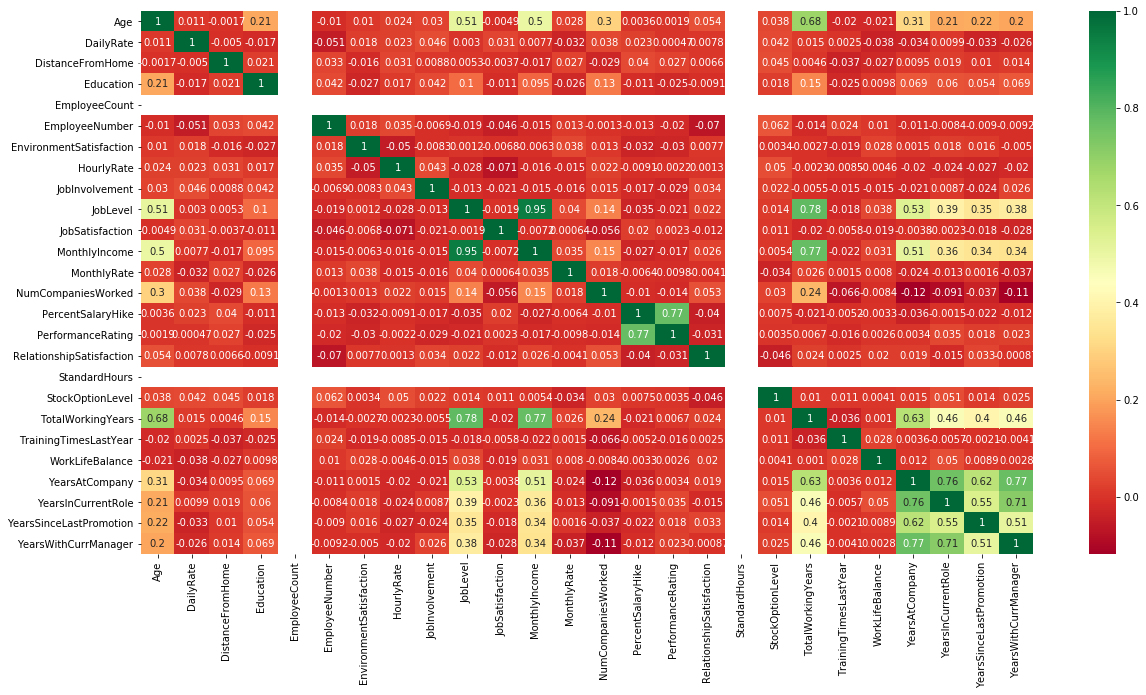

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='RdYlGn')

In [13]:
atr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
atr2 = atr.drop(["Gender","Age","EducationField","PerformanceRating","MonthlyIncome","JobLevel","Education","Department","BusinessTravel","RelationshipSatisfaction","TrainingTimesLastYear","DailyRate","WorkLifeBalance","StandardHours","MonthlyRate","JobInvolvement","HourlyRate","EmployeeCount", "Over18", "OverTime","EmployeeNumber","NumCompaniesWorked","JobRole","MaritalStatus","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","PercentSalaryHike"], axis = 1)


In [15]:
atr2.shape

(1470, 6)

In [16]:
atr2.head()

,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,StockOptionLevel,TotalWorkingYears
0,Yes,1,2,4,0,8
1,No,8,3,2,1,10
2,Yes,2,4,3,0,7
3,No,3,4,3,0,8
4,No,2,1,2,1,6


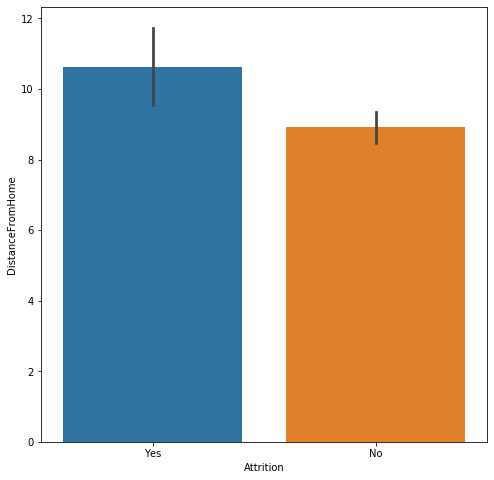

In [17]:
plt.figure(figsize=(8,8))
sns.barplot(y ="DistanceFromHome" , x= "Attrition", data=atr)

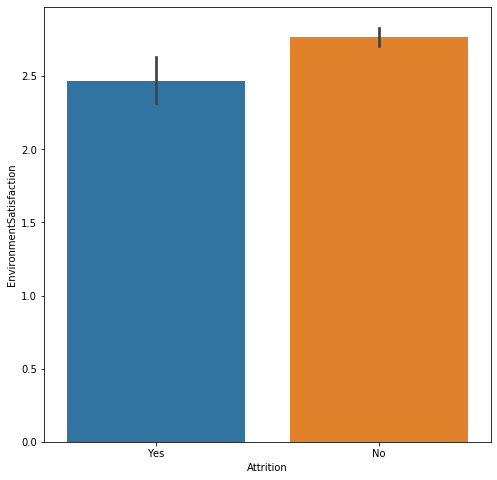

In [18]:
plt.figure(figsize=(8,8))
sns.barplot(y ="EnvironmentSatisfaction" , x= "Attrition", data=atr)

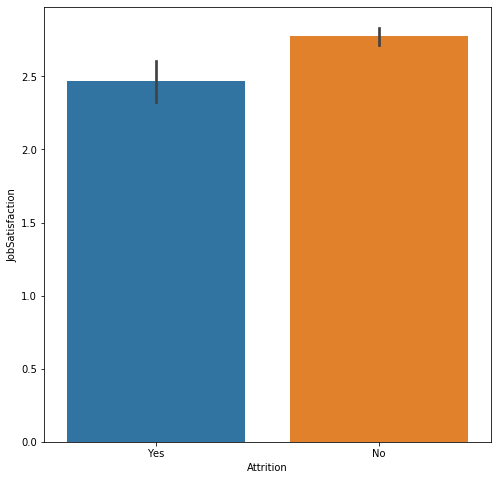

In [19]:
plt.figure(figsize=(8,8))
sns.barplot(y ="JobSatisfaction" , x= "Attrition", data=atr)

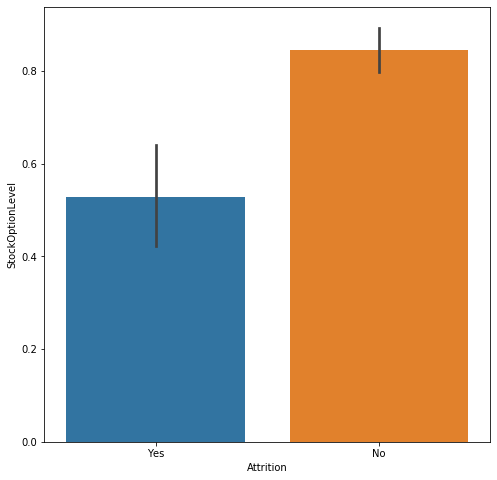

In [20]:
plt.figure(figsize=(8,8))
sns.barplot(y ="StockOptionLevel" , x= "Attrition", data=atr)

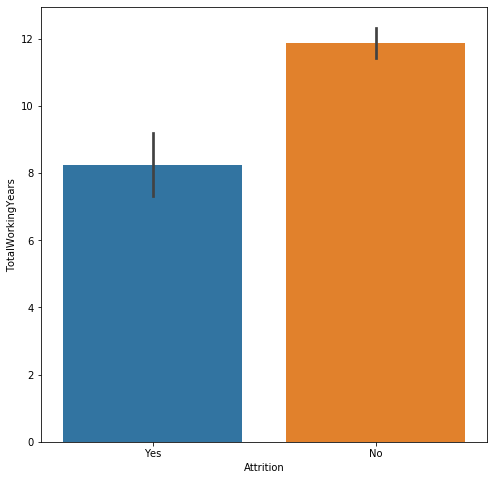

In [21]:
plt.figure(figsize=(8,8))
sns.barplot(y ="TotalWorkingYears" , x= "Attrition", data=atr)

In [22]:
from sklearn.preprocessing import LabelEncoder


In [23]:
le = LabelEncoder()

In [24]:
atr2[atr2.select_dtypes(include=['object']).columns]  = atr2[atr2.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [25]:
atr2.head()

,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,StockOptionLevel,TotalWorkingYears
0,1,1,2,4,0,8
1,0,8,3,2,1,10
2,1,2,4,3,0,7
3,0,3,4,3,0,8
4,0,2,1,2,1,6


In [26]:
atr2_x = atr2.iloc[:,1:6]
atr2_y = atr2.iloc[:, 0]

In [27]:
atr2_x.head()

,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,StockOptionLevel,TotalWorkingYears
0,1,2,4,0,8
1,8,3,2,1,10
2,2,4,3,0,7
3,3,4,3,0,8
4,2,1,2,1,6


In [28]:
atr2_y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
vif = pd.DataFrame() # create empty data frame 
vif["vif_values"] = [variance_inflation_factor(atr2_x.values, i) for i in range(atr2_x.shape[1])]
vif["Variables"]  = atr2_x.columns

In [31]:
vif

,vif_values,Variables
0,2.124612,DistanceFromHome
1,4.615431,EnvironmentSatisfaction
2,4.586694,JobSatisfaction
3,1.800362,StockOptionLevel
4,2.714625,TotalWorkingYears


In [32]:
# sampling.....................
from sklearn.model_selection import train_test_split


In [33]:
atr2_x_train, atr2_x_test, atr2_y_train, atr2_y_test = train_test_split(atr2_x, atr2_y, test_size = .2)

In [34]:
print(atr2_x_train.shape)
print(atr2_y_train.shape)
print("-----")
print(atr2_x_test.shape)
print(atr2_y_test.shape)

(1176, 5)
(1176,)
-----
(294, 5)
(294,)


In [35]:
# Model and Summary ...........

# logistic regression .............................


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_reg = LogisticRegression(class_weight = 'balanced')

In [38]:
log_reg.fit(atr2_x_train , atr2_y_train)

LogisticRegression(class_weight='balanced')

In [39]:
pred_atr2 = log_reg.predict(atr2_x_test)

In [40]:
pred_atr2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0])

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
tab1 = confusion_matrix(pred_atr2, atr2_y_test)
tab1 

array([[154,   8],
       [ 84,  48]], dtype=int64)

In [43]:
# tp = 145 fp =20 fn = 94 tn = 34

In [44]:
tab1.diagonal().sum()/tab1.sum()*100

68.70748299319727

In [45]:
# FP / (FP + TN)
fpr = 10 / (10 + 33)

In [46]:
fpr

0.23255813953488372

In [47]:
# TP /(TP + FN)
tpr = 153 / (153 + 98)

In [48]:
tpr

0.6095617529880478

In [49]:
list(log_reg.coef_)

[array([ 0.03062948, -0.1663342 , -0.2076287 , -0.39745554, -0.05283873])]

In [50]:
log_reg.intercept_

array([1.49783731])

In [51]:
pred_prob_full =log_reg.predict_proba(atr2_x)
pred_prob_full = pd.DataFrame(pred_prob_full)

In [52]:
customer_data = pd.DataFrame({"Attrition" : atr2_y , "Prob" : pred_prob_full.iloc[ : , 1]})
customer_data.head()

,Attrition,Prob
0,1,0.485647
1,0,0.475712
2,1,0.475271
3,0,0.469735
4,0,0.565378


In [53]:
customer_data = customer_data.sort_values("Prob", ascending= False)
customer_data.head()

,Attrition,Prob
1379,1,0.823065
748,1,0.813956
1365,1,0.813585
42,1,0.805576
798,1,0.804992


In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [55]:
pred_test = log_reg.predict(atr2_x_test)

In [56]:
roc_auc_score(pred_test , atr2_y_test)

0.6571268237934905

In [57]:
pred_test_prob = log_reg.predict_proba(atr2_x_test)

In [58]:
fpr , tpr , thre = roc_curve(atr2_y_test ,  pred_test_prob[:, 1])

In [59]:
fpr , tpr , thre

(array([0.        , 0.        , 0.        , 0.00420168, 0.00420168,
        0.01260504, 0.01260504, 0.0210084 , 0.0210084 , 0.03781513,
        0.03781513, 0.04201681, 0.04201681, 0.04621849, 0.04621849,
        0.06302521, 0.06302521, 0.07142857, 0.07142857, 0.08823529,
        0.08823529, 0.09243697, 0.09243697, 0.10084034, 0.10084034,
        0.11344538, 0.11344538, 0.11344538, 0.11764706, 0.11764706,
        0.12605042, 0.12605042, 0.13865546, 0.13865546, 0.1512605 ,
        0.1512605 , 0.15546218, 0.15546218, 0.16806723, 0.16806723,
        0.18067227, 0.18067227, 0.20588235, 0.20588235, 0.21428571,
        0.21428571, 0.21848739, 0.21848739, 0.24789916, 0.24789916,
        0.28571429, 0.28571429, 0.29411765, 0.29411765, 0.30672269,
        0.30672269, 0.31092437, 0.31092437, 0.32773109, 0.32773109,
        0.33613445, 0.35294118, 0.42016807, 0.42016807, 0.43697479,
        0.43697479, 0.48739496, 0.48739496, 0.50420168, 0.50420168,
        0.50840336, 0.51680672, 0.52521008, 0.53

Text(0.3, 0.5, 'Area under curve is .58')

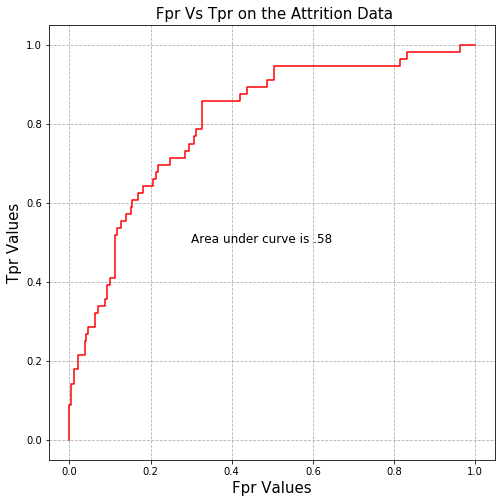

In [60]:
plt.figure(figsize= (8 , 8))
plt.plot(fpr, tpr, color = "r")
plt.grid(linestyle =  '--')
plt.xlabel("Fpr Values", size = 15 )
plt.ylabel("Tpr Values", size = 15 )
plt.title(" Fpr Vs Tpr on the Attrition Data",size = 15 )
plt.text(x = .3 , y = .5 , s= "Area under curve is .58" , size = 12)

In [61]:
# f1_score = 2 * (Precision * recall )/ (precision + recall )
f1_score = 2 * (90 * 59)/(90 + 59)
f1_score

71.2751677852349

In [62]:
# precision = TP /(TP+FP)

precision = 145 / (145 + 16)

In [63]:
precision

0.9006211180124224

In [64]:
# recall  = TP / (TP+FN) 
recall = 145 /(145 +98)
recall

0.5967078189300411

# summary 

1) conf_mat accuracy  = 61.224489795918366
2) fpr = 0.3137254901960784
3) tpr = 0.5967078189300411
4) f1_score = 71.2751677852349 
 
# higher the accuracy and higher the tpr (recall) better the model , lower the fpr better the model . 
# higher the f1 score , better the model .



In [65]:
# Decision tree....................

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt = DecisionTreeClassifier(criterion =  "gini", max_depth = 4, min_samples_split = 30)

In [68]:
dt.fit(atr2_x_train, atr2_y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=30)

In [69]:
pred_val = dt.predict(atr2_x_test)

In [70]:
pred_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
tab1 = confusion_matrix(pred_val, atr2_y_test)
tab1

array([[235,  52],
       [  3,   4]], dtype=int64)

In [73]:
tab1.diagonal().sum()/tab1.sum()

0.8129251700680272

In [74]:
dt.feature_importances_

array([0.1878957 , 0.        , 0.20408412, 0.25903541, 0.34898477])

In [75]:
dt.feature_importances_.sum()

1.0

In [76]:
feat_importances = pd.DataFrame({"Feature": atr2_x_train.columns , "Importances": dt.feature_importances_})

In [77]:
feat_importances

,Feature,Importances
0,DistanceFromHome,0.187896
1,EnvironmentSatisfaction,0.000000
2,JobSatisfaction,0.204084
3,StockOptionLevel,0.259035
4,TotalWorkingYears,0.348985


In [78]:
feat_importances.sort_values("Importances", ascending = False)

,Feature,Importances
4,TotalWorkingYears,0.348985
3,StockOptionLevel,0.259035
2,JobSatisfaction,0.204084
0,DistanceFromHome,0.187896
1,EnvironmentSatisfaction,0.000000


In [79]:
from io import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import pydot
import matplotlib.pyplot as plt

In [80]:
dot_data = StringIO()

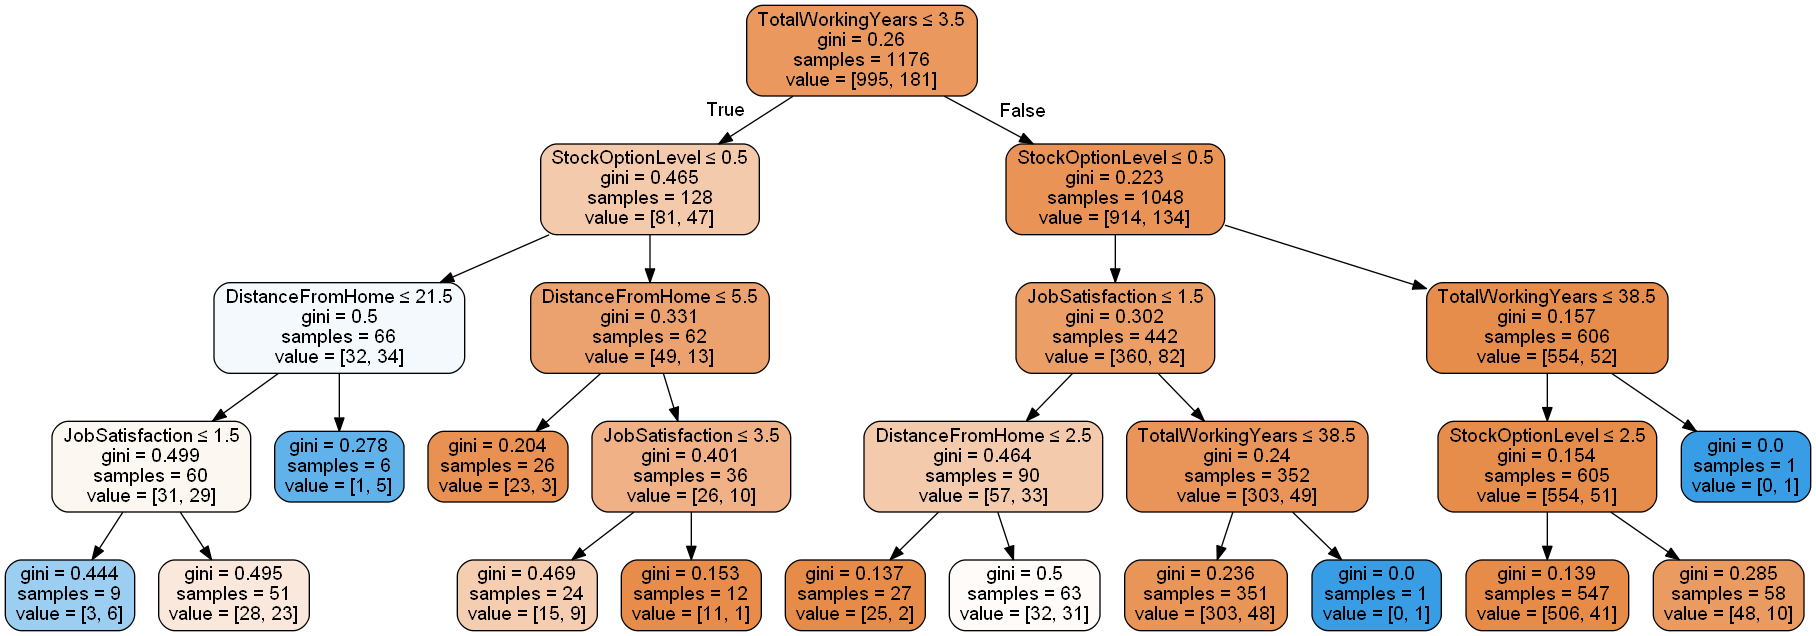

In [81]:
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names = list(atr2_x_train.columns))
#matplotlib inline
#plt.show()
#%matplotlib inline


graph  = pydotplus.graph_from_dot_data(dot_data.getvalue())
(graph,)  = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [82]:
#Summary 



In [83]:
# random forest .............

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(atr2_x_train, atr2_y_train)

RandomForestClassifier(n_estimators=50)

In [86]:
pred_rf =  rf.predict(atr2_x_test)

In [87]:
pred_rf

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1])

In [88]:
tab1 = confusion_matrix(pred_rf, atr2_y_test)
tab1

array([[220,  46],
       [ 18,  10]], dtype=int64)

In [89]:
tab1.diagonal().sum() / tab1.sum() 

0.782312925170068

In [90]:
rf.feature_importances_

array([0.31994848, 0.11834227, 0.13098681, 0.08784908, 0.34287336])

In [91]:
rf.feature_importances_.sum()

1.0

In [92]:
atr2_x_train.columns

Index(['DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears'],
      dtype='object')

In [93]:
feat_importances = pd.DataFrame({"Feature": atr2_x_train.columns, "importances" : rf.feature_importances_})
feat_importances.sort_values("importances", ascending = False)

,Feature,importances
4,TotalWorkingYears,0.342873
0,DistanceFromHome,0.319948
2,JobSatisfaction,0.130987
1,EnvironmentSatisfaction,0.118342
3,StockOptionLevel,0.087849
